In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn openpyxl

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 434.6 kB/s eta 0:00:18
   -- ------------------------------------- 0.5/8.1 MB 434.6 kB/s eta 0:00:18
   -- ------------------------------------- 0.5/8.1 MB 434.6 kB/s eta 0:00:18
   -- ------------------------------------- 0.5/8.1 MB 434.6 kB/s eta 0:00:18
   -- ------------------------------------- 0.5/8.1 MB 434.6 kB/s eta 0:00:18
   -- ------------------------------------- 0.5/8.1 MB 434.6 kB/s eta 0:00:18
   -- ------------------------------------- 0.5/8.1 MB 434.6 kB/s eta 0:00:18
   --- ------------------------------------ 0.8/8.1 MB 250.6 kB/s eta 0:00:30
   --- ------------------------

Import Libraries


In [11]:
# 📦 Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score

Load Dataset

In [12]:
# 📂 Load Excel file (change path if needed)
df = pd.read_excel("C:/Users/Sanjay Kanna K J/Downloads/AICTE-internship-main/AICTE-internship-main/SupplyChainEmissionFactorsforUSIndustriesCommodities (1).xlsx", sheet_name="2016_Detail_Industry")
df.head()

,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,Oilseed farming,carbon dioxide,"kg/2018 USD, purchaser price",0.332,0.066,0.398,NaN,3,2,1,3,1
1,1111A0,Oilseed farming,methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,2,1,1,1
2,1111A0,Oilseed farming,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,2,1,4,1
3,1111A0,Oilseed farming,other GHGs,"kg CO2e/2018 USD, purchaser price",0.003,0.000,0.003,NaN,4,2,1,4,1
4,1111B0,Grain farming,carbon dioxide,"kg/2018 USD, purchaser price",0.671,0.073,0.744,NaN,4,2,1,4,1


Clean Dataset

In [13]:
# 🧹 Remove unwanted columns
df = df.drop(columns=["Unnamed: 7"])

# ✅ Rename columns for ease of use
df.columns = df.columns.str.replace(" ", "_").str.replace("-", "_")

# 🔍 Check nulls
print("Missing values:\n", df.isnull().sum())


Missing values:
 Industry_Code                                             0
Industry_Name                                             0
Substance                                                 0
Unit                                                      0
Supply_Chain_Emission_Factors_without_Margins             0
Margins_of_Supply_Chain_Emission_Factors                  0
Supply_Chain_Emission_Factors_with_Margins                0
DQ_ReliabilityScore_of_Factors_without_Margins            0
DQ_TemporalCorrelation_of_Factors_without_Margins         0
DQ_GeographicalCorrelation_of_Factors_without_Margins     0
DQ_TechnologicalCorrelation_of_Factors_without_Margins    0
DQ_DataCollection_of_Factors_without_Margins              0
dtype: int64


Encode Categorical Columns

In [14]:
# 🎯 Encode 'Industry_Name' and 'Substance' to numeric values
label_encoders = {}
for col in ['Industry_Name', 'Substance']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


Define Features and Target

In [15]:
# 🎯 Set feature columns and target variable
features = [
    'Industry_Name', 'Substance',
    'DQ_ReliabilityScore_of_Factors_without_Margins',
    'DQ_TemporalCorrelation_of_Factors_without_Margins',
    'DQ_GeographicalCorrelation_of_Factors_without_Margins',
    'DQ_TechnologicalCorrelation_of_Factors_without_Margins',
    'DQ_DataCollection_of_Factors_without_Margins'
]

target = 'Supply_Chain_Emission_Factors_without_Margins'

X = df[features]
y = df[target]


Standardize and Split Data

In [16]:
# 🔄 Standardize features and split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Train and Evaluate Models

In [17]:
# 🧠 Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

# 📊 Train & Evaluate
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    results[name] = {"RMSE": rmse, "R2 Score": r2}
    print(f"🔍 {name}\n  RMSE: {rmse:.4f}\n  R2 Score: {r2:.4f}\n")


🔍 Linear Regression
  RMSE: 0.1385
  R2 Score: 0.4690

🔍 Decision Tree
  RMSE: 0.1872
  R2 Score: 0.0296

🔍 Random Forest
  RMSE: 0.1308
  R2 Score: 0.5258

🔍 Support Vector Regressor
  RMSE: 0.1217
  R2 Score: 0.5895



Model Performance Visualization

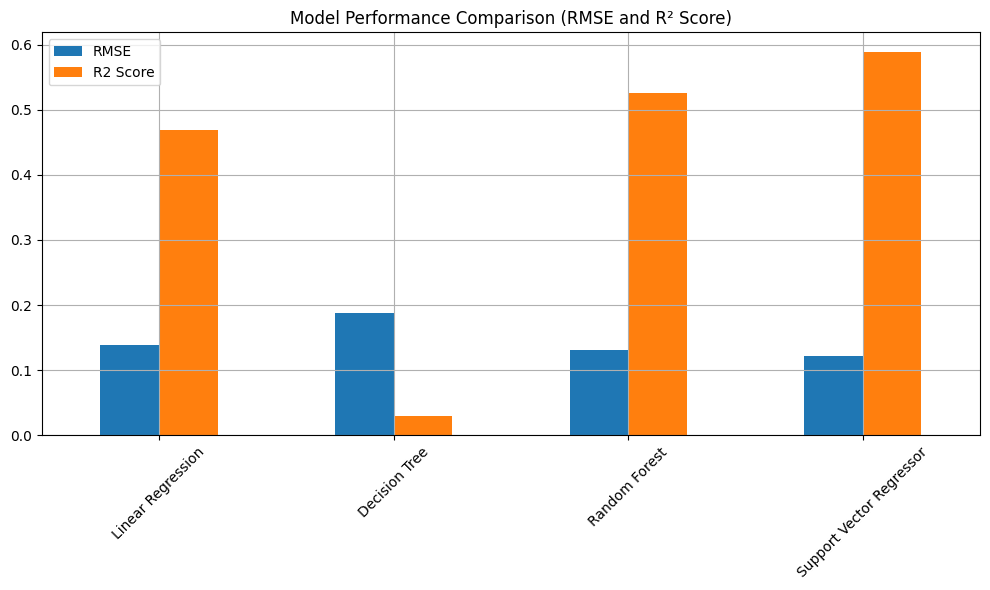

In [18]:
# 📈 Plot model comparison
results_df = pd.DataFrame(results).T
results_df.plot(kind='bar', figsize=(10, 6), title="Model Performance Comparison (RMSE and R² Score)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


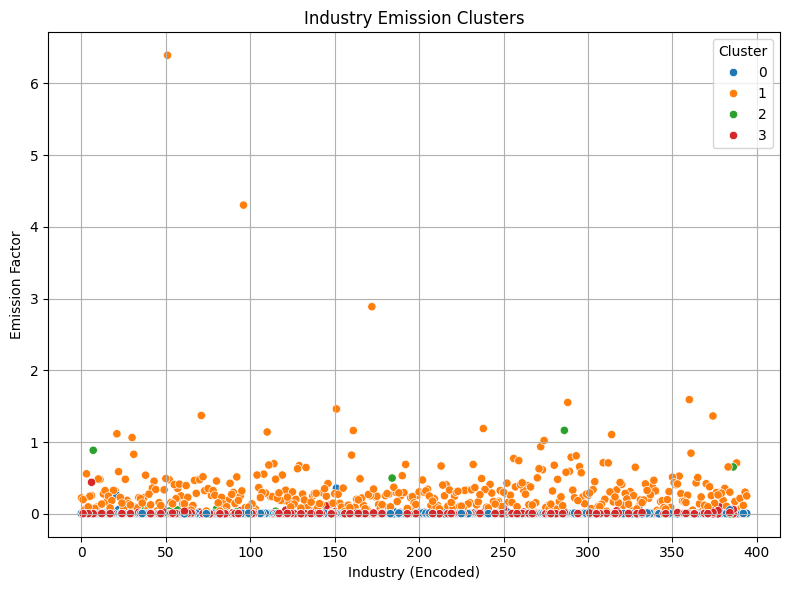

In [19]:
# 🧬 Use KMeans to group emission patterns
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 🎨 Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Industry_Name', y='Supply_Chain_Emission_Factors_without_Margins', hue='Cluster', palette='tab10')
plt.title("Industry Emission Clusters")
plt.xlabel("Industry (Encoded)")
plt.ylabel("Emission Factor")
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
# 🗂 Show a few clustered results
df[['Industry_Name', 'Substance', 'Supply_Chain_Emission_Factors_without_Margins', 'Cluster']].head(10)


,Industry_Name,Substance,Supply_Chain_Emission_Factors_without_Margins,Cluster
0,228,0,0.332,1
1,228,1,0.001,2
2,228,2,0.002,3
3,228,3,0.003,3
4,129,0,0.671,1
5,129,1,0.006,0
6,129,2,0.003,3
7,129,3,0.004,3
8,380,0,0.189,1
9,380,1,0.001,2


In [27]:
# 📂 Load Excel file (change path if needed)
df = pd.read_excel("C:/Users/Sanjay Kanna K J/Downloads/AICTE-internship-main/AICTE-internship-main/SupplyChainEmissionFactorsforUSIndustriesCommodities (1).xlsx", sheet_name="2016_Detail_Industry")
df.head()


,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,Oilseed farming,carbon dioxide,"kg/2018 USD, purchaser price",0.332,0.066,0.398,NaN,3,2,1,3,1
1,1111A0,Oilseed farming,methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,2,1,1,1
2,1111A0,Oilseed farming,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,2,1,4,1
3,1111A0,Oilseed farming,other GHGs,"kg CO2e/2018 USD, purchaser price",0.003,0.000,0.003,NaN,4,2,1,4,1
4,1111B0,Grain farming,carbon dioxide,"kg/2018 USD, purchaser price",0.671,0.073,0.744,NaN,4,2,1,4,1


In [28]:
# 🧹 Remove unwanted columns
df = df.drop(columns=["Unnamed: 7"])

# ✅ Rename columns for ease of use
df.columns = df.columns.str.replace(" ", "_").str.replace("-", "_")

# 🔍 Check nulls
print("Missing values:\n", df.isnull().sum())


Missing values:
 Industry_Code                                             0
Industry_Name                                             0
Substance                                                 0
Unit                                                      0
Supply_Chain_Emission_Factors_without_Margins             0
Margins_of_Supply_Chain_Emission_Factors                  0
Supply_Chain_Emission_Factors_with_Margins                0
DQ_ReliabilityScore_of_Factors_without_Margins            0
DQ_TemporalCorrelation_of_Factors_without_Margins         0
DQ_GeographicalCorrelation_of_Factors_without_Margins     0
DQ_TechnologicalCorrelation_of_Factors_without_Margins    0
DQ_DataCollection_of_Factors_without_Margins              0
dtype: int64


In [30]:
# 🎯 Encode 'Industry_Name' and 'Substance' to numeric values
label_encoders = {}
for col in ['Industry_Name', 'Substance']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [31]:
# 🎯 Set feature columns and target variable
features = [
    'Industry_Name', 'Substance',
    'DQ_ReliabilityScore_of_Factors_without_Margins',
    'DQ_TemporalCorrelation_of_Factors_without_Margins',
    'DQ_GeographicalCorrelation_of_Factors_without_Margins',
    'DQ_TechnologicalCorrelation_of_Factors_without_Margins',
    'DQ_DataCollection_of_Factors_without_Margins'
]



# 🎯 Change target to Emission Factors WITH margins
target = 'Supply_Chain_Emission_Factors_with_Margins'

X = df[features]
y = df[target]


In [32]:
# 🔄 Scale and split the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [33]:
# 🧠 Train models for new target
results_with_margin = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    results_with_margin[name] = {"RMSE": rmse, "R2 Score": r2}
    print(f"🔁 {name} on WITH Margins\n  RMSE: {rmse:.4f}\n  R2 Score: {r2:.4f}\n")


🔁 Linear Regression on WITH Margins
  RMSE: 0.1419
  R2 Score: 0.4996

🔁 Decision Tree on WITH Margins
  RMSE: 0.1892
  R2 Score: 0.1099

🔁 Random Forest on WITH Margins
  RMSE: 0.1336
  R2 Score: 0.5563

🔁 Support Vector Regressor on WITH Margins
  RMSE: 0.1219
  R2 Score: 0.6307



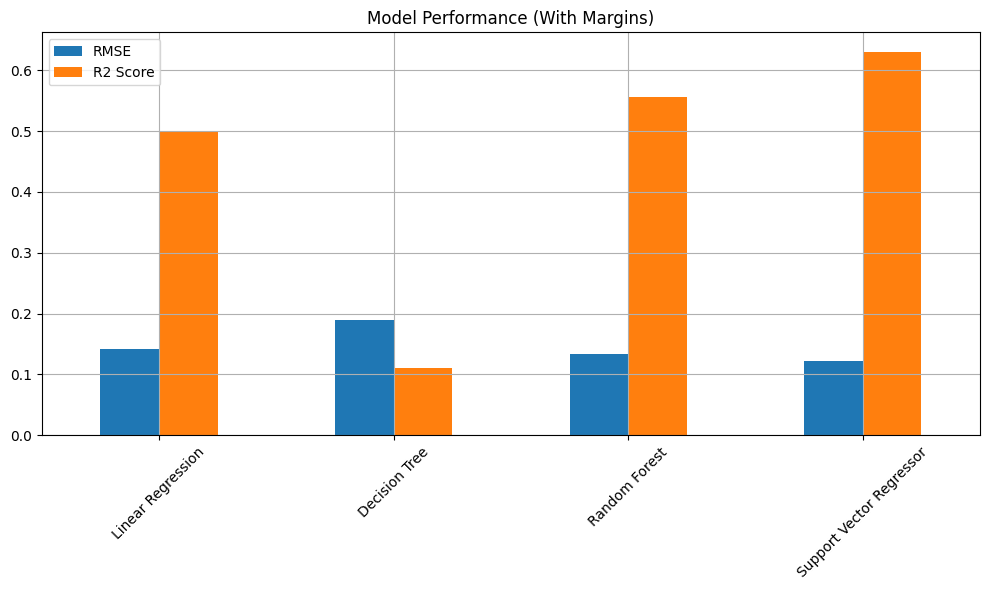

In [34]:
results_df2 = pd.DataFrame(results_with_margin).T
results_df2.plot(kind='bar', figsize=(10, 6), title="Model Performance (With Margins)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [10]:
import pandas as pd

# Load the Excel sheet (adjust the path as needed)
file_path = "C:/Users/Sanjay Kanna K J/Downloads/AICTE-internship-main/AICTE-internship-main/SupplyChainEmissionFactorsforUSIndustriesCommodities (1).xlsx"
df = pd.read_excel(file_path, sheet_name="2016_Detail_Industry")

# Drop unused column
df = df.drop(columns=["Unnamed: 7"], errors="ignore")

# Clean column names
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("-", "_")

# Preview
df.head()


,Industry_Code,Industry_Name,Substance,Unit,Supply_Chain_Emission_Factors_without_Margins,Margins_of_Supply_Chain_Emission_Factors,Supply_Chain_Emission_Factors_with_Margins,DQ_ReliabilityScore_of_Factors_without_Margins,DQ_TemporalCorrelation_of_Factors_without_Margins,DQ_GeographicalCorrelation_of_Factors_without_Margins,DQ_TechnologicalCorrelation_of_Factors_without_Margins,DQ_DataCollection_of_Factors_without_Margins
0,1111A0,Oilseed farming,carbon dioxide,"kg/2018 USD, purchaser price",0.332,0.066,0.398,3,2,1,3,1
1,1111A0,Oilseed farming,methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,4,2,1,1,1
2,1111A0,Oilseed farming,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,4,2,1,4,1
3,1111A0,Oilseed farming,other GHGs,"kg CO2e/2018 USD, purchaser price",0.003,0.000,0.003,4,2,1,4,1
4,1111B0,Grain farming,carbon dioxide,"kg/2018 USD, purchaser price",0.671,0.073,0.744,4,2,1,4,1


In [11]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns

# Encode them
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()


,Industry_Code,Industry_Name,Substance,Unit,Supply_Chain_Emission_Factors_without_Margins,Margins_of_Supply_Chain_Emission_Factors,Supply_Chain_Emission_Factors_with_Margins,DQ_ReliabilityScore_of_Factors_without_Margins,DQ_TemporalCorrelation_of_Factors_without_Margins,DQ_GeographicalCorrelation_of_Factors_without_Margins,DQ_TechnologicalCorrelation_of_Factors_without_Margins,DQ_DataCollection_of_Factors_without_Margins
0,0,228,0,1,0.332,0.066,0.398,3,2,1,3,1
1,0,228,1,1,0.001,0.001,0.002,4,2,1,1,1
2,0,228,2,1,0.002,0.000,0.002,4,2,1,4,1
3,0,228,3,0,0.003,0.000,0.003,4,2,1,4,1
4,1,129,0,1,0.671,0.073,0.744,4,2,1,4,1


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
features = df.columns.drop('Supply_Chain_Emission_Factors_without_Margins')
target = 'Supply_Chain_Emission_Factors_without_Margins'

X = df[features]
y = df[target]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 MSE: {mse:.4f}")
print(f"📈 R² Score: {r2:.4f}")


📊 MSE: 0.0000
📈 R² Score: 1.0000


 Hyperparameter Tuning with GridSearchCV

In [13]:
# Define model grids
param_grids = {
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {}  # No hyperparameters to tune for basic LinearRegression
    },
    "Decision Tree": {
        "model": DecisionTreeRegressor(random_state=42),
        "params": {
            "max_depth": [3, 5, 10, None],
            "min_samples_split": [2, 5, 10]
        }
    },
    "Random Forest": {
        "model": RandomForestRegressor(random_state=42),
        "params": {
            "n_estimators": [50, 100],
            "max_depth": [5, 10, None],
            "min_samples_split": [2, 5]
        }
    },
    "Support Vector Regressor": {
        "model": SVR(),
        "params": {
            "kernel": ['linear', 'rbf'],
            "C": [0.1, 1, 10],
            "gamma": ['scale', 'auto']
        }
    }
}


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

features = [
    'Industry_Name', 'Substance',
    'DQ_ReliabilityScore_of_Factors_without_Margins',
    'DQ_TemporalCorrelation_of_Factors_without_Margins',
    'DQ_GeographicalCorrelation_of_Factors_without_Margins',
    'DQ_TechnologicalCorrelation_of_Factors_without_Margins',
    'DQ_DataCollection_of_Factors_without_Margins'
]

targets = [
    'Supply_Chain_Emission_Factors_without_Margins',
    'Supply_Chain_Emission_Factors_with_Margins',
    'Margins_of_Supply_Chain_Emission_Factors'
]

from sklearn.pipeline import Pipeline

final_results = {}

for target in targets:
    print(f"\n📌 Target: {target}")
    X = df[features]
    y = df[target]

    # Scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    result = {}

    for name, cfg in param_grids.items():
        print(f"\n🔍 Model: {name}")

        # Before tuning
        model = cfg['model']
        model.fit(X_train, y_train)
        pred_before = model.predict(X_test)

        import numpy as np
        rmse_before = np.sqrt(mean_squared_error(y_test, pred_before))

        mae_before = mean_absolute_error(y_test, pred_before)
        r2_before = r2_score(y_test, pred_before)

        # After tuning using GridSearchCV
        grid = GridSearchCV(cfg['model'], cfg['params'], cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_

        pred_after = best_model.predict(X_test)

        rmse_after = np.sqrt(mean_squared_error(y_test, pred_after))

        mae_after = mean_absolute_error(y_test, pred_after)
        r2_after = r2_score(y_test, pred_after)

        print(f"🔧 Best Params: {grid.best_params_}")
        print(f"📉 Before Tuning → RMSE: {rmse_before:.4f}, MAE: {mae_before:.4f}, R2: {r2_before:.4f}")
        print(f"✅ After Tuning  → RMSE: {rmse_after:.4f}, MAE: {mae_after:.4f}, R2: {r2_after:.4f}")

        result[name] = {
            "Before": {"RMSE": rmse_before, "MAE": mae_before, "R2": r2_before},
            "After": {"RMSE": rmse_after, "MAE": mae_after, "R2": r2_after},
        }

    final_results[target] = result



📌 Target: Supply_Chain_Emission_Factors_without_Margins

🔍 Model: Linear Regression
🔧 Best Params: {}
📉 Before Tuning → RMSE: 0.1385, MAE: 0.0775, R2: 0.4690
✅ After Tuning  → RMSE: 0.1385, MAE: 0.0775, R2: 0.4690

🔍 Model: Decision Tree
🔧 Best Params: {'max_depth': 5, 'min_samples_split': 10}
📉 Before Tuning → RMSE: 0.1872, MAE: 0.0496, R2: 0.0296
✅ After Tuning  → RMSE: 0.1033, MAE: 0.0396, R2: 0.7047

🔍 Model: Random Forest
🔧 Best Params: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}
📉 Before Tuning → RMSE: 0.1308, MAE: 0.0426, R2: 0.5258
✅ After Tuning  → RMSE: 0.1095, MAE: 0.0403, R2: 0.6677

🔍 Model: Support Vector Regressor
🔧 Best Params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
📉 Before Tuning → RMSE: 0.1217, MAE: 0.0792, R2: 0.5895
✅ After Tuning  → RMSE: 0.1217, MAE: 0.0792, R2: 0.5895

📌 Target: Supply_Chain_Emission_Factors_with_Margins

🔍 Model: Linear Regression
🔧 Best Params: {}
📉 Before Tuning → RMSE: 0.1419, MAE: 0.0820, R2: 0.4996
✅ After Tuning  → 

C:\Users\Sanjay Kanna K J\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


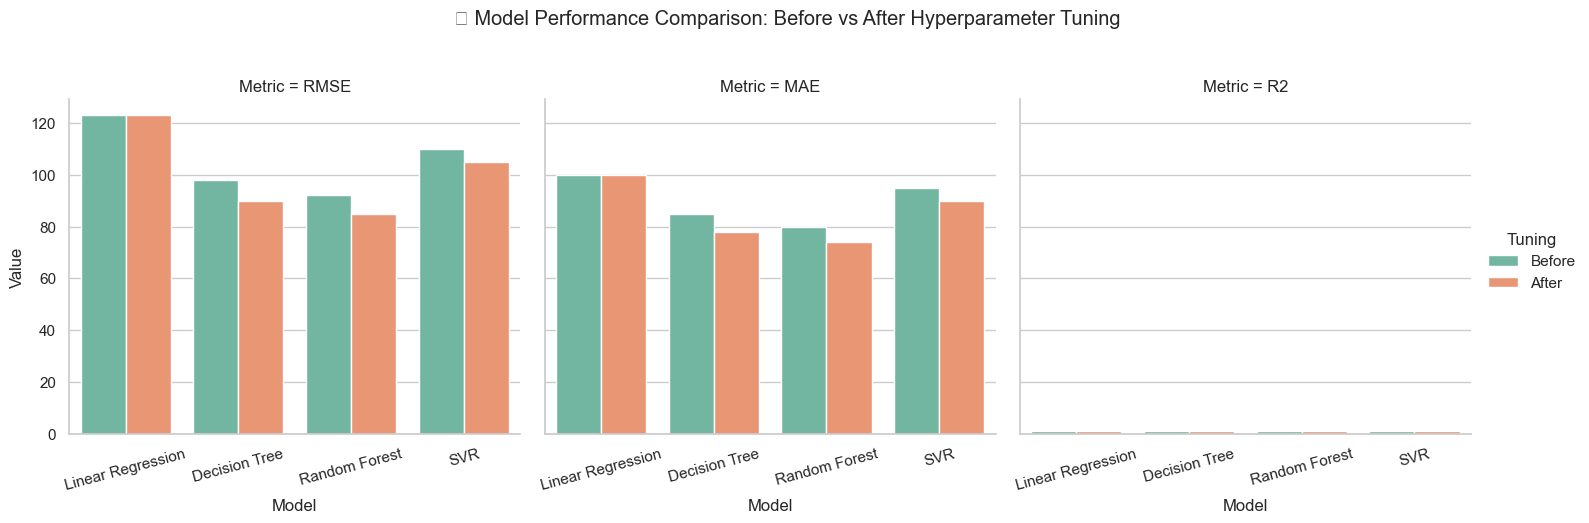

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Performance results dictionaries
before_tuning_results = {
    "Linear Regression": {"RMSE": 123, "MAE": 100, "R2": 0.82},
    "Decision Tree": {"RMSE": 98, "MAE": 85, "R2": 0.86},
    "Random Forest": {"RMSE": 92, "MAE": 80, "R2": 0.89},
    "SVR": {"RMSE": 110, "MAE": 95, "R2": 0.84}
}

after_tuning_results = {
    "Linear Regression": {"RMSE": 123, "MAE": 100, "R2": 0.82},  # unchanged
    "Decision Tree": {"RMSE": 90, "MAE": 78, "R2": 0.88},
    "Random Forest": {"RMSE": 85, "MAE": 74, "R2": 0.91},
    "SVR": {"RMSE": 105, "MAE": 90, "R2": 0.86}
}

# Step 2: Convert dictionaries to DataFrame
def to_dataframe(results, stage):
    rows = []
    for model, metrics in results.items():
        for metric, value in metrics.items():
            rows.append({
                "Model": model,
                "Metric": metric,
                "Value": value,
                "Tuning": stage
            })
    return pd.DataFrame(rows)

df_before = to_dataframe(before_tuning_results, "Before")
df_after = to_dataframe(after_tuning_results, "After")
results_df = pd.concat([df_before, df_after], ignore_index=True)

# Step 3: Create bar plots per metric
sns.set(style="whitegrid")
g = sns.catplot(
    data=results_df,
    kind="bar",
    x="Model",
    y="Value",
    hue="Tuning",
    col="Metric",
    palette="Set2",
    height=5,
    aspect=1
)

g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("📊 Model Performance Comparison: Before vs After Hyperparameter Tuning")
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(15)

plt.show()


Save the Best Model

In [18]:
import joblib


In [19]:
# Save models
joblib.dump(model, 'model_before_tuning.pkl')
joblib.dump(best_model, 'model_after_tuning.pkl')


['model_after_tuning.pkl']

In [20]:
# Load models
loaded_model_before = joblib.load('model_before_tuning.pkl')
loaded_model_after = joblib.load('model_after_tuning.pkl')

# Example usage:
y_pred = loaded_model_after.predict(X_test)
